# 其他的技術指標（１）

## 程式實作：繪製峰谷線指標

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

#### 讀取看盤軟體匯出資料

In [2]:
##### 使用2022年3月11日到2023年7月12日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day22(1).xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','ZIGZAG_5%','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','ZIGZAG_5%','成交量','MA5','MA10'])

# 保存峰谷線
df_zigzag = df.drop(columns=['開盤價','最高價','最低價','收盤價','SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','成交量','MA5','MA10'])

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將峰谷線的Columns的名稱由中文改為英文
df_zigzag = df_zigzag.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

          Date  ZIGZAG_5%
8   2022-03-23      47.45
41  2022-05-12      36.15
59  2022-06-08      40.10
67  2022-06-20      27.40
68  2022-06-21      29.10
76  2022-07-01      26.10
86  2022-07-15      36.05
89  2022-07-20      31.90
97  2022-08-01      34.00
103 2022-08-09      30.40
115 2022-08-25      36.30
124 2022-09-07      31.50
126 2022-09-12      34.90
138 2022-09-28      28.75
144 2022-10-06      30.75
148 2022-10-13      27.60
151 2022-10-18      29.20
154 2022-10-21      27.50
173 2022-11-17      30.85
179 2022-11-25      29.20
185 2022-12-05      33.40
209 2023-01-09      29.20
232 2023-02-21      32.10
272 2023-04-25      28.30
277 2023-05-03      31.35
294 2023-05-26      28.95
312 2023-06-21      37.65
316 2023-06-29      34.50
324 2023-07-11      39.25
325 2023-07-12      37.85


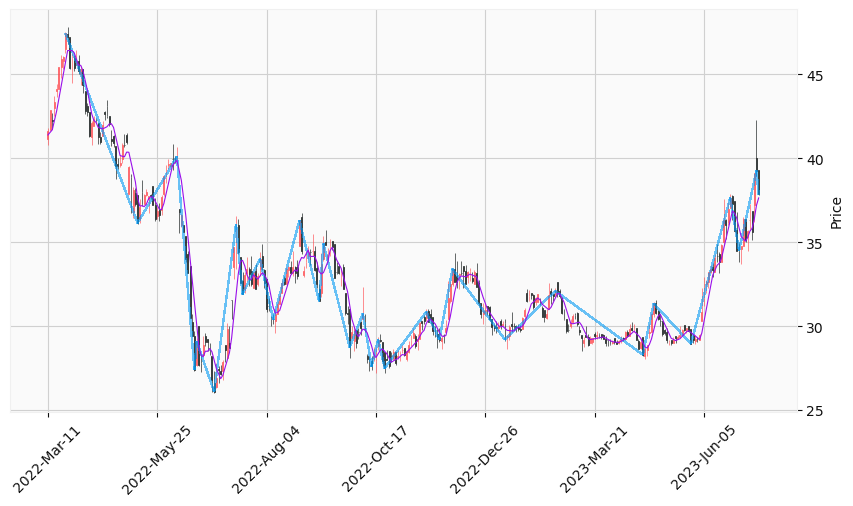

In [3]:
# 取得ZigZag轉折點
df_zigzag = df_zigzag.dropna()
print(df_zigzag)

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定轉折線
seq_of_seq_of_points = [] 
for _current in range(0,len(df_zigzag)) :
    _next = _current + 1
    if _next < len(df_zigzag) :
        seq_of_seq_of_points.append([(df_zigzag.iloc[_current]['Date'],df_zigzag.iloc[_current]['ZIGZAG_5%']),(df_zigzag.iloc[_next]['Date'],df_zigzag.iloc[_next]['ZIGZAG_5%'])])
    else :
        break
        
# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.8,color='xkcd:violet')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()),alines=dict(alines=seq_of_seq_of_points, linewidths=1, colors='xkcd:azure', alpha=0.6))
mpf.plot(df_k_line,**kwargs)

#### 比較：峰谷線指標與方向變化點

                Date  Price Type
DateIndex                       
8         2022-03-23  47.45   HI
41        2022-05-12  36.15   LO
59        2022-06-08  40.10   HI
67        2022-06-20  27.40   LO
68        2022-06-21  29.10   HI
76        2022-07-01  26.10   LO
86        2022-07-15  36.05   HI
89        2022-07-20  31.90   LO
97        2022-08-01  34.00   HI
103       2022-08-09  30.40   LO
115       2022-08-25  36.30   HI
124       2022-09-07  31.50   LO
126       2022-09-12  34.90   HI
138       2022-09-28  28.75   LO
144       2022-10-06  30.75   HI
148       2022-10-13  27.60   LO
151       2022-10-18  29.20   HI
154       2022-10-21  27.50   LO
173       2022-11-17  30.85   HI
179       2022-11-25  29.20   LO
185       2022-12-05  33.40   HI
209       2023-01-09  29.20   LO
232       2023-02-21  32.10   HI
272       2023-04-25  28.30   LO
277       2023-05-03  31.35   HI
294       2023-05-26  28.95   LO
312       2023-06-21  37.65   HI
315       2023-06-28  34.50   LO


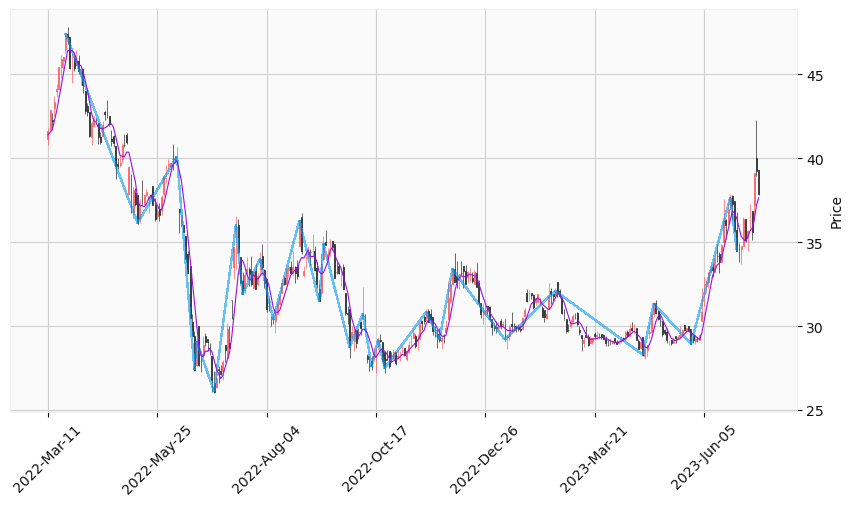

In [4]:
import myutils

# 尋找方向變化點：方向變化點已經整併進myutils套件中(不用重複貼程式碼到這邊)
_,_,max_min = myutils.FindingDirectionalChangePoints(df_k_line,mode='close')
print(max_min)

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定轉折線
seq_of_seq_of_points = []
for _current in range(0,len(max_min)) :
    _next = _current + 1
    if _next < len(max_min) :
        seq_of_seq_of_points.append([(max_min.iloc[_current]['Date'],max_min.iloc[_current]['Price']),(max_min.iloc[_next]['Date'],max_min.iloc[_next]['Price'])])
    else :
        break
        
# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.8,color='xkcd:violet')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()),alines=dict(alines=seq_of_seq_of_points, linewidths=1, colors='xkcd:azure', alpha=0.6))
mpf.plot(df_k_line,**kwargs)

## 程式實作：繪製與計算趨向指標

#### 讀取看盤軟體匯出資料

In [5]:
##### 使用2016年12月20日到2017年6月27日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day22(2).xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10','+DI14','-DI14','ADX14'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','+DI14','-DI14','ADX14']) 

# 保存DMI指標
df_dmi = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將DMI指標的Columns的名稱由中文改為英文
df_dmi = df_dmi.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將DMI指標的Date設為Index
df_dmi.set_index(df_dmi['Date'],inplace=True)
df_dmi = df_dmi.drop(columns=['Date'])

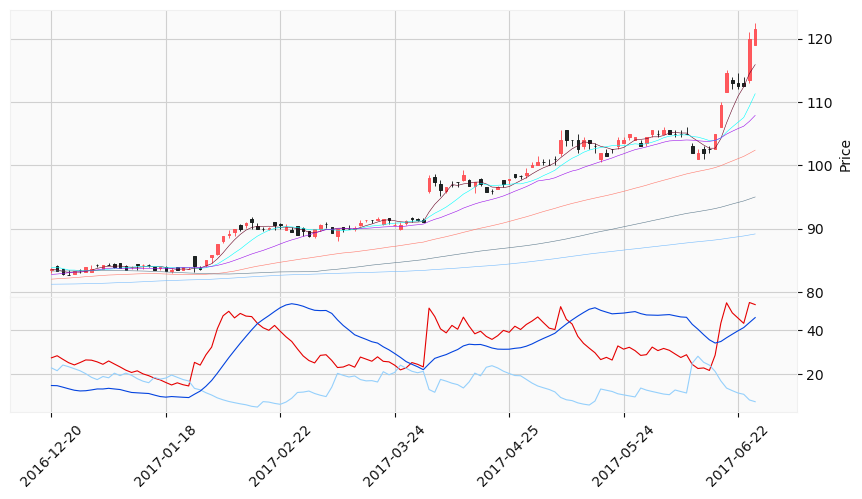

In [6]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與DMI指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue'),
    'DI+': mpf.make_addplot(df_dmi['+DI14'],width=0.8,panel=1,secondary_y=False,color='xkcd:red'),
    'DI-': mpf.make_addplot(df_dmi['-DI14'],width=0.8,panel=1,secondary_y=False,color='xkcd:light blue'),
    'ADX': mpf.make_addplot(df_dmi['ADX14'],width=0.8,panel=1,color='xkcd:blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 使用talib套件計算ＤＭＩ指標

In [7]:
from talib.abstract import *

# 當使用talib Abstract API時，DataFrame欄位名稱需為小寫
# 請參考書籍：Python：量化交易 Ta-Lib 技術指標 139個活用技巧
df_k_line_talib = df_k_line.copy()
df_k_line_talib.columns=[ i.lower() for i in df_k_line_talib.columns]

In [8]:
talib_plus_di = PLUS_DI( df_k_line_talib, timeperiod=14)
talib_minus_di = MINUS_DI( df_k_line_talib, timeperiod=14)
talib_adx = ADX( df_k_line_talib, timeperiod=14)

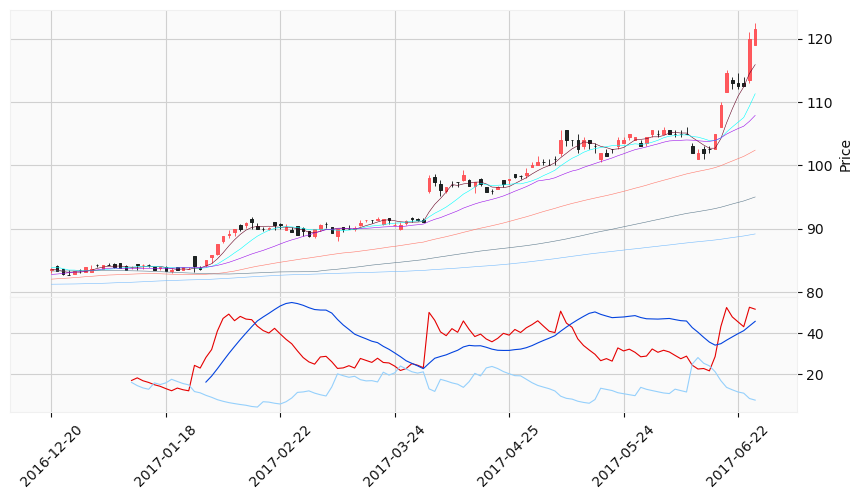

In [9]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與DMI指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue'),
    'DI+': mpf.make_addplot(talib_plus_di,width=0.8,panel=1,secondary_y=False,color='xkcd:red'),
    'DI-': mpf.make_addplot(talib_minus_di,width=0.8,panel=1,secondary_y=False,color='xkcd:light blue'),
    'ADX': mpf.make_addplot(talib_adx,width=0.8,panel=1,color='xkcd:blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)